# Matrix & Vector

In [1]:
import numpy as np

def compute_vector_length(vector):
    len_of_vector = np.linalg.norm(vector)
    
    return len_of_vector

vector = np.array([ -2 , 4 , 9 , 21])
result = compute_vector_length([vector])
print(round(result,2))

23.28


In [2]:
def compute_dot_product(vector1, vector2):
    result = np.dot(vector1, vector2)
    
    return result

v1 = np.array([0 , 1 , -1 , 2])
v2 = np.array([2 , 5 , 1 , 0])
result = compute_dot_product(v1 , v2)
print(round(result,2))

4


In [3]:
x = np.array([[1, 2], [3, 4]])
k = np.array([1, 2])
print(x.dot(k))

[ 5 11]


In [4]:
x = np.array([[-1, 2], [3, -4]])
k = np.array([1, 2])
print(x@k)

[ 3 -5]


In [5]:
def matrix_multi_vector(matrix, vector):
    return np.dot(matrix, vector)


m = np.array([[-1, 1, 1], [0, -4, 9]])
v = np.array([0, 2, 1])
result = matrix_multi_vector(m, v)
print(result)

[3 1]


In [6]:
def matrix_multi_matrix(matrix1, matrix2):
    len_of_vector = np.dot(matrix1, matrix2)
    return len_of_vector

m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3], [6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(result)

[[  6  -1]
 [-16 -10]]


### Hadamard product.

In [7]:
m1 = np.eye(3)
m2 = np.array([[1 , 1 , 1],[2 , 2 , 2],[3 , 3 , 3]])
result = m1@m2
print(result)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [8]:
m1 = np.eye (2)
m1 = np.reshape(m1 ,(-1 ,4) )[0]
m2 = np.array([[1, 1, 1, 1],[2, 2, 2, 2],[3, 3, 3, 3] , [4, 4, 4, 4]])
result = m1@m2
print(result)

[5. 5. 5. 5.]


In [9]:
m1 = np.array([[1 , 2], [3 , 4]])
m1 = np.reshape(m1, (-1 ,4), "F") [0]
m2 = np.array([[1, 1, 1, 1],[2, 2, 2, 2],[3, 3, 3, 3],[4, 4, 4, 4]])
result = m1@m2 # Hadamad product
print(result)

[29 29 29 29]


### Matrix inverse
- Inverse A =[[-2, 6],[8, -4]]
- Determinant of A: det(A) = a * d - b * c = (-2) * (-4) - 6 * 8 = -40
- det(A) != 0, A is invertible
- Inverse Matrix: A^(-1) = 
(1 / det(A)) * [[d, -b], [-c, a]] = (1 / -40) * [[-4, -6], [-8, -2]] = 
[[0.1, 0.15], 
[0.2, 0.05]]

In [10]:
def inverse_matrix(matrix):
    matrix_t = np.linalg.inv(matrix)
    return matrix_t

matrix = np.array([[-2, 6], [8, -4]])
print(inverse_matrix(matrix))
    

[[0.1  0.15]
 [0.2  0.05]]


# Eigenvector & Eigenvalues


In [11]:
def compute_eigenvalues_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors

matrix = np.array([[0.9 , 0.2], [0.1 , 0.8]])
eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print(eigenvectors)

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [12]:
def compute_cosine(v1, v2):
    # Tính tích vô hướng của hai vector
    dot_product = np.dot(v1, v2)
    # Tính độ dài (norm) của từng vector
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    # Tính cosine similarity
    cos_sim = dot_product / (norm_v1 * norm_v2)
    return cos_sim

x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x,y)
print (round (result, 3))
    

0.577


# Background subtraction (tách nền)

In [13]:
import cv2
import matplotlib.pyplot as plt

bg1_image = cv2.imread('./public/images/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('./public/images/Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('./public/images/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

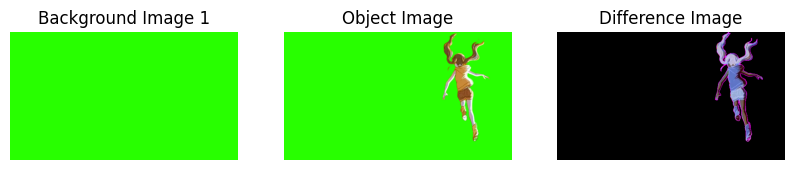

In [14]:
def compute_difference(bg_img, input_img):
    difference_single_channel = np.abs(bg_img - input_img)
    return difference_single_channel

difference_single_channel = compute_difference(bg1_image, ob_image)


# Display the images using matplotlib
def show_image(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
show_image(bg1_image, 'Background Image 1')
plt.subplot(1, 3, 2)
show_image(ob_image, 'Object Image')
plt.subplot(1, 3, 3)
show_image(difference_single_channel, 'Difference Image')
plt.show()

In [15]:
def compute_binary_mask(difference_single_channel):
    # Áp dụng ngưỡng để tạo mask nhị phân
    _, binary_mask = cv2.threshold(
        difference_single_channel, 30, 255, cv2.THRESH_BINARY)

    # Áp dụng morphology để loại bỏ nhiễu
    kernel = np.ones((5, 5), np.uint8)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

    return binary_mask

(-0.5, 677.5, 380.5, -0.5)

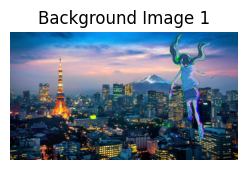

In [16]:
def replace_background(bg1_img, bg2_img, ob_img):
    difference_single_channel = compute_difference(bg1_img, ob_img)
    binary_mask = compute_binary_mask(difference_single_channel)
    output = np.where(binary_mask==255, ob_img, bg2_img)
    return output


# Replace the background
output_image = replace_background(bg1_image, bg2_image, ob_image)

# Display the result using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Background Image 1')
plt.axis('off')